In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Reshape images to 1D arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize pixel values to be between 0 and 1
train_images_flat = train_images_flat.astype('float32') / 255.0
test_images_flat = test_images_flat.astype('float32') / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
# Standardize features
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

In [3]:
# Initialize logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

In [4]:
# Train the classifier
logistic_classifier.fit(train_images_scaled, train_labels.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
# Predict labels for test images
predicted_labels = logistic_classifier.predict(test_images_scaled)
probs = logistic_classifier.predict_proba(test_images_scaled)
preds = probs[:,1]

In [8]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Test accuracy:", accuracy)

Test accuracy: 0.3671


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, logistic_classifier.predict(test_images_scaled))
precision = precision_score(test_labels, logistic_classifier.predict(test_images_scaled), average='weighted')
recall = recall_score(test_labels, logistic_classifier.predict(test_images_scaled), average='weighted')
f1 = f1_score(test_labels, logistic_classifier.predict(test_images_scaled), average='weighted')

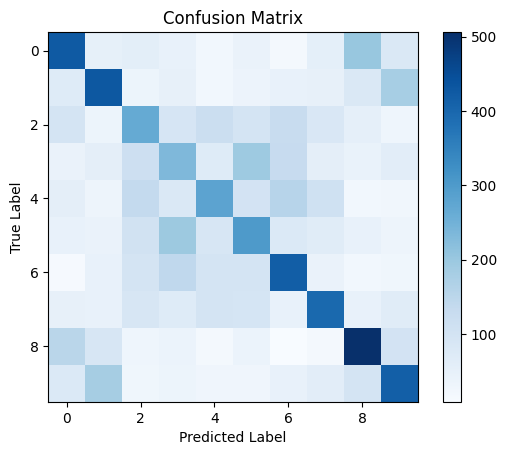

Accuracy: 0.3671
Precision: 0.36518996602170967
Recall: 0.3671
F1 Score: 0.36566445434636113


In [15]:
# Plot confusion matrix
plt.figure()
conf_mat = confusion_matrix(test_labels, logistic_classifier.predict(test_images_scaled))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

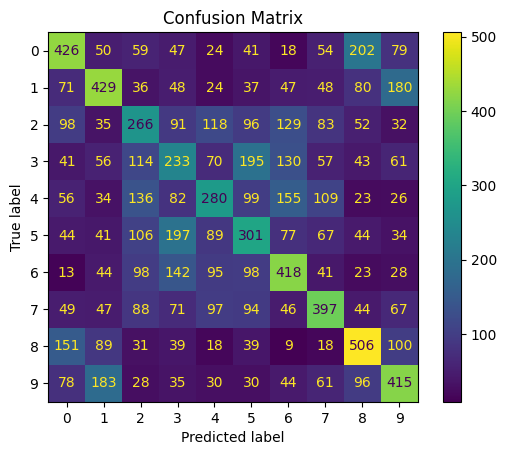

In [19]:
# Confusion Matrix (Same version)
conf_matrix = confusion_matrix(test_labels, predicted_labels)
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot()
plt.title("Confusion Matrix")
plt.show()